In [7]:
import numpy as np
from hipposlam.utils import read_pickle
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
import os
import matplotlib as mpl
from matplotlib import cm
from tqdm import tqdm

In [8]:


project_tag = 'Avoidance_Sift'
data_dir = join('data', project_tag)
plot_dir = join('plots', project_tag, 'firing_fields')
os.makedirs(plot_dir, exist_ok=True)
trajdata = read_pickle(join(data_dir, 'traj.pickle'))
metadata = read_pickle(join(data_dir, 'meta.pickle'))
stored_f = metadata['stored_f']
f_pos = metadata['fpos']


trajdf = pd.DataFrame(trajdata)
trajdf['X_Nrow'] = trajdf['X'].apply(lambda x : x.shape[0])
print('Max x row ', trajdf['X_Nrow'].max())
trajdf



Max x row  71


,t,x,y,z,a,objID,f_sigma,X,X_Nrow
0,128,4.320020,3.252637,0.061593,1.570797,[0],{0: [1]},"[[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]",1
1,256,4.320020,3.175768,0.058121,1.570796,[0],{0: [2]},"[[0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]]",1
2,384,4.320020,3.098910,0.058760,1.570795,[0],{0: [3]},"[[0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]]",1
3,512,4.320020,3.022087,0.059021,1.570795,[0],{0: [4]},"[[0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]]",1
4,640,4.320020,2.945278,0.059127,1.570795,[0],{0: [5]},"[[0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]]",1
...,...,...,...,...,...,...,...,...,...
15399,1976192,4.580136,4.205103,0.059201,1.351344,[15],"{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...",71
15400,1976320,4.596855,4.280061,0.059201,1.351344,[],"{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...",71
15401,1976448,4.613574,4.355019,0.059201,1.351344,[],"{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...",71
15402,1976576,4.630293,4.429977,0.059201,1.351344,[],"{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...",71


In [9]:
trajdf

,t,x,y,z,a,objID,f_sigma,X,X_Nrow
0,128,4.320020,3.252637,0.061593,1.570797,[0],{0: [1]},"[[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]",1
1,256,4.320020,3.175768,0.058121,1.570796,[0],{0: [2]},"[[0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]]",1
2,384,4.320020,3.098910,0.058760,1.570795,[0],{0: [3]},"[[0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]]",1
3,512,4.320020,3.022087,0.059021,1.570795,[0],{0: [4]},"[[0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]]",1
4,640,4.320020,2.945278,0.059127,1.570795,[0],{0: [5]},"[[0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]]",1
...,...,...,...,...,...,...,...,...,...
15399,1976192,4.580136,4.205103,0.059201,1.351344,[15],"{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...",71
15400,1976320,4.596855,4.280061,0.059201,1.351344,[],"{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...",71
15401,1976448,4.613574,4.355019,0.059201,1.351344,[],"{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...",71
15402,1976576,4.630293,4.429977,0.059201,1.351344,[],"{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...",71


# By Active F

In [10]:
norm = mpl.colors.Normalize(vmin=-np.pi, vmax=np.pi)
cmap = cm.hsv

In [11]:
Num_Fnodes = trajdf['X_Nrow'].max()

xdict = dict()
ydict = dict()
adict = dict()
fposdict = dict()
for i in range(trajdf.shape[0]):

    Xmat = trajdf['X'][i]
    x = trajdf['x'][i]
    y = trajdf['y'][i]
    a = trajdf['a'][i]
    active_rowIDs = np.where(np.sum(Xmat, axis=1) > 0)[0]

    for rowid in active_rowIDs:
        # nodekey = [str(k) for k, v in stored_f.items() if v == rowid][0]
        # fposdict[rowid] = f_pos[nodekey.split('_')[0]]


        if rowid in xdict:
            xdict[rowid].append(x)
            ydict[rowid].append(y)
            adict[rowid].append(a)

        else:
            xdict[rowid] = [x]
            ydict[rowid] = [y]
            adict[rowid] = [a]




In [12]:
plot_dir_byActiveF = join(plot_dir, 'ByActiveF')
os.makedirs(plot_dir_byActiveF, exist_ok=True)

np.random.seed(0)
ivec = np.random.permutation(Num_Fnodes)
for i in range(Num_Fnodes):
    N = len(xdict[i])
    frac = 1

    nodekey = [str(k) for k, v in stored_f.items() if v == i][0]

    ranvec = np.random.permutation(N)


    x = np.array(xdict[i])[ranvec][:int(N*frac)]
    y = np.array(ydict[i])[ranvec][:int(N*frac)]
    a = np.array(adict[i])[ranvec][:int(N*frac)]

    angvec = np.exp(1j * a)

    fig, ax = plt.subplots(figsize=(14, 6), facecolor='w')

    ax.plot(trajdf.x, trajdf.y, color='gray', alpha=0.5)
    im = ax.quiver(x, y, np.real(angvec), np.imag(angvec), color=cmap(norm(a)), scale=70, cmap='hsv')
    cbar = plt.colorbar(im, ax=ax)
    cbar.ax.set_yticks([0, 0.5, 1])
    cbar.ax.set_yticklabels(['$-\pi$', '0', '$\pi$'])
    cbar.ax.set_ylabel('Head direction (rad)')
    ax.set_title('Node = %s'%(nodekey))
    fig.tight_layout()
    fig.savefig(join(plot_dir_byActiveF, '%s.png'%nodekey), dpi=200)
    plt.close(fig)



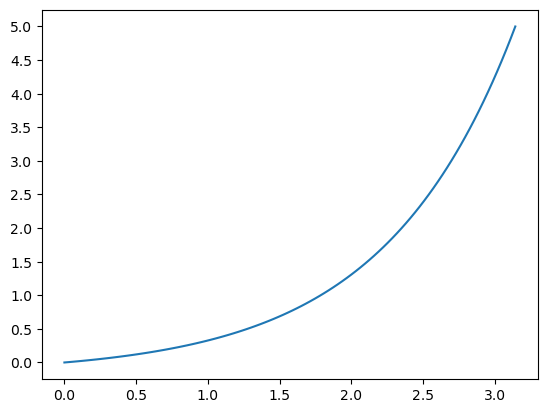

In [29]:
k = 5
a0 = np.pi
a = np.linspace(0, np.pi, 100)
x = 3
# y = (x**(a/a0)-1) / x * k + (k/x)
y = (x ** a -1) / (x**a0 - 1) * k


plt.plot(a, y)
_ = plt.yticks(np.arange(0, 5.1, 0.5))

# By sigma

In [73]:
max_sigma = 10
min_sigma = 1

norm = mpl.colors.Normalize(vmin=min_sigma, vmax=max_sigma)
cmap = cm.jet

In [74]:
xdict = dict()
ydict = dict()
adict = dict()
sigmadict = dict()
fposdict = dict()

for i in tqdm(range(trajdf.shape[0])):
    if i > 50:
        break
    f_sigma = trajdf['f_sigma'][i]

    for nodekey in stored_f.keys():



        if nodekey in f_sigma:

            if nodekey not in xdict:
                xdict[nodekey] = []
                ydict[nodekey] = []
                adict[nodekey] = []
                sigmadict[nodekey] = []
                nodepos = f_pos[nodekey.split('_')[0]]
                fposdict[nodekey] = nodepos


            sigma_list = f_sigma[nodekey]
            for sigma in sigma_list:
                x = trajdf['x'][i]
                y = trajdf['y'][i]
                a = trajdf['a'][i]
                xdict[nodekey].append(x)
                ydict[nodekey].append(y)
                adict[nodekey].append(a)
                sigmadict[nodekey].append(sigma)


100%|██████████| 21292/21292 [00:01<00:00, 12397.97it/s]


In [81]:
plot_dir_sigma = join(plot_dir, 'BySigma')
os.makedirs(plot_dir_sigma, exist_ok=True)

np.random.seed(0)
ivec = np.random.permutation(Num_Fnodes)
for nodekey in tqdm(stored_f.keys()):

    N = len(xdict[nodekey])
    if N < 1:
        continue
    frac = 1

    ranvec = np.random.permutation(N)


    x = np.array(xdict[nodekey])[ranvec][:int(N*frac)]
    y = np.array(ydict[nodekey])[ranvec][:int(N*frac)]
    a = np.array(adict[nodekey])[ranvec][:int(N*frac)]
    sigma = np.array(sigmadict[nodekey])[ranvec][:int(N*frac)]
    fpos = fposdict[nodekey]

    angvec = np.exp(1j * a)

    fig, ax = plt.subplots(figsize=(14, 6), facecolor='w')

    ax.scatter(fpos[0], fpos[1], marker='o', color='k')
    ax.plot(trajdf.x, trajdf.y, color='gray', alpha=0.5)
    im = ax.quiver(x, y, np.real(angvec), np.imag(angvec), color=cmap(norm(sigma)), scale=70, cmap='hsv')
    cbar = plt.colorbar(im, ax=ax)
    cbar.ax.set_yticks(np.linspace(0, 1, 10))
    cbar.ax.set_yticklabels(np.arange(1, 11, 1))
    cbar.ax.set_ylabel('Sigma')
    ax.set_title('Node = %s'%(nodekey))
    fig.tight_layout()
    fig.savefig(join(plot_dir_sigma, '%s.png'%nodekey), dpi=200)
    plt.close(fig)



100%|██████████| 256/256 [01:28<00:00,  2.91it/s]


In [80]:
np.arange(0, 1.1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])